In [139]:
from tpot import TPOTClassifier
from tpot import TPOTRegressor
import numpy as np
import pandas as pd
import pickle


with open('movie_data_with_budgets.pkl', 'rb') as f:
    data = pickle.load(f)

data = data.rename(columns={"imdbID":"tconst"})

actors_df = pd.read_csv("actors_cluster.csv")
directors_df = pd.read_csv("directors_cluster.csv")
writers_df = pd.read_csv("writers_cluster.csv")


In [393]:
# with open('movie_data_with_budgets.pkl', 'wb') as file: 
      
#     # A new file will be created 
#     pickle.dump(data, file) 

In [6]:
# Imdb title data
title_principals = pd.read_csv("title.principals.tsv", sep="\t", low_memory=False)
tconst = data["tconst"].tolist()
title_principals = title_principals[title_principals["tconst"].isin(tconst)]

In [140]:
# Add nconst list to data
tmp_list = []

for title in tconst:
    tmp_list.append(title_principals.loc[title_principals["tconst"] == title, "nconst"].values)

data["nconst"] = tmp_list

In [51]:
# Compute average production budgets for actors

# actors_df["avg_budget"] = np.zeros(len(actors_df), dtype="float")

# for name_id in actors_df["nconst"].values:
#     title_values = title_principals[title_principals["category"].isin(["actor", "actress"])].loc[title_principals["nconst"] == name_id, "tconst"].values
#     actors_df.loc[actors_df["nconst"] == name_id, "avg_budget"] = data.loc[data["tconst"].isin(title_values), "Production budget"].values.mean()

In [52]:
# Compute average production budgets for directors

# directors_df["avg_budget"] = np.zeros(len(directors_df), dtype="float")

# for name_id in directors_df["nconst"].values:
#     title_values = title_principals[title_principals["category"] == "director"].loc[title_principals["nconst"] == name_id, "tconst"].values
#     directors_df.loc[directors_df["nconst"] == name_id, "avg_budget"] = data.loc[data["tconst"].isin(title_values), "Production budget"].values.mean()

In [56]:
# Compute average production budgets for writers

# writers_df["avg_budget"] = np.zeros(len(writers_df), dtype="float")

# for name_id in writers_df["nconst"].values:
#     title_values = title_principals[title_principals["category"] == "writer"].loc[title_principals["nconst"] == name_id, "tconst"].values
#     writers_df.loc[writers_df["nconst"] == name_id, "avg_budget"] = data.loc[data["tconst"].isin(title_values), "Production budget"].values.mean()

In [57]:
# actors_df.to_csv("actors_cluster.csv")
# directors_df.to_csv("directors_cluster.csv")
# writers_df.to_csv("writers_cluster.csv")

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# scaler = StandardScaler()

# directors_df["avg_budget_T"] = scaler.fit_transform(np.log(directors_df[["avg_budget"]]))
# kmeans = KMeans(n_clusters=8)
# kmeans.fit(directors_df[["avg_budget_T", "log_avg_profit_T"]])
# directors_df["kmeans_2"] = kmeans.labels_


# plt.scatter(x=directors_df["avg_budget"], y=directors_df["log_avg_profit"], c=directors_df["kmeans_2"])
# plt.xlabel("Average production budget")
# plt.ylabel("Average log profit")
# plt.grid(True)
# plt.show()

In [165]:
# Create df of average profits, budgets and number of films for actors, directors and writers of each title

averages_df = pd.DataFrame(np.zeros((len(data), 9)))
averages_df.columns = ["actors_avg_profits", "actors_avg_budgets", "actors_avg_nof_films",\
                        "directors_avg_profits", "directors_avg_budgets", "directors_avg_nof_films",\
                        "writers_avg_profits", "writers_avg_budgets", "writers_avg_nof_films"]

nconst_list = data["nconst"].values
for row, name_ids in enumerate(nconst_list):

    averages_df.loc[row, "actors_avg_profits"] = actors_df.loc[actors_df["nconst"].isin(name_ids), "avg_profit"].mean()
    averages_df.loc[row, "actors_avg_budgets"] = actors_df.loc[actors_df["nconst"].isin(name_ids), "avg_budget"].mean()
    averages_df.loc[row, "actors_avg_nof_films"] = actors_df.loc[actors_df["nconst"].isin(name_ids), "nof_films"].mean()

    averages_df.loc[row, "directors_avg_profits"] = directors_df.loc[directors_df["nconst"].isin(name_ids), "avg_profit"].mean()
    averages_df.loc[row, "directors_avg_budgets"] = directors_df.loc[directors_df["nconst"].isin(name_ids), "avg_budget"].mean()
    averages_df.loc[row, "directors_avg_nof_films"] = directors_df.loc[directors_df["nconst"].isin(name_ids), "nof_films"].mean()

    averages_df.loc[row, "writers_avg_profits"] = writers_df.loc[writers_df["nconst"].isin(name_ids), "avg_profit"].mean()
    averages_df.loc[row, "writers_avg_budgets"] = writers_df.loc[writers_df["nconst"].isin(name_ids), "avg_budget"].mean()
    averages_df.loc[row, "writers_avg_nof_films"] = writers_df.loc[writers_df["nconst"].isin(name_ids), "nof_films"].mean()

In [161]:
# Create df of genres for each title

genres = np.unique(np.hstack(data["Genre"]))

genre_df = pd.DataFrame(np.zeros((len(data), len(genres))))
genre_df.columns = genres

genres = data["Genre"].values

for row in range(len(data)):
    for genre in genres[row]:
        genre_df.loc[row, genre] = 1


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., nan])

In [189]:
# Create df of release month

released = data["Released"].dt.month.values
month_columns = np.unique(released)

month_df = pd.DataFrame(np.zeros((len(data), len(month_columns))))
month_df.columns = month_columns

for row, month in enumerate(released):
    month_df.loc[row, month] = 1

month_df.columns = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "NaN"]

In [248]:
# Adjust budgets for inflation

inf_adj_df = pd.read_csv("inflation_adjustments.csv", sep="|")
inf_adj_df.columns = ["year", "adjustment"]

inf_adj_df["adjustment"] = inf_adj_df["adjustment"].str.replace('%', '').astype(float)
inf_adj_df["adjustment"] = (inf_adj_df["adjustment"]+100)/100


adjusted_budget = np.zeros(len(data))
years = data["Year"].values
budgets = data["Production budget"].values

for i in range(len(data)):
    adjustment = inf_adj_df.loc[inf_adj_df["year"] > years[i], "adjustment"].product()
    adjusted_budget[i] = budgets[i]*adjustment


data["adjusted_prod_budget"] = adjusted_budget


In [327]:
data["log_profit"] = data["profit"].round(2).transform(lambda x: np.log10(x) if x > 0 else 0).round(2)

In [394]:

X = data[["log_profit", "Runtime", "adjusted_prod_budget"]].copy().reset_index().drop(columns="index")
X = pd.concat((X, averages_df, genre_df, month_df), axis=1)
X = X.dropna()
y = X["log_profit"].values

with open('log_profit_X.pkl', 'wb') as file: 
    pickle.dump(X, file) 

X = X.drop(columns="log_profit")




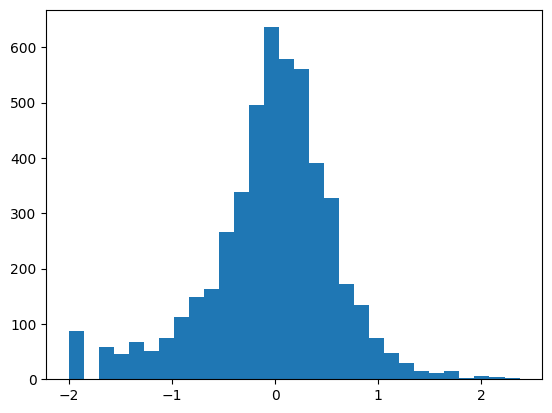

In [392]:
plt.hist(y, bins=30)
plt.show()

In [331]:
from tpot import TPOTClassifier
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

                                                                               
Generation 1 - Current best internal CV score: -0.10532808746251159
                                                                              
Generation 2 - Current best internal CV score: -0.10532808746251159
                                                                              
Generation 3 - Current best internal CV score: -0.10532808746251159
                                                                              
Generation 4 - Current best internal CV score: -0.10532808746251159
                                                                              
Generation 5 - Current best internal CV score: -0.10510541624397958
                                                           
Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.55, min_samples_leaf=2, min_samples_split=8, n_estimators=100)
-0.11057497755241588


In [335]:
tpot.export('tpot_log_progit_regressor.py')

In [334]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = tpot.predict(X_test)

print('MAE',mean_absolute_error(y_pred=y_pred, y_true=y_test))
print('MSE',mean_squared_error(y_pred=y_pred, y_true=y_test))
print('R2',r2_score(y_pred=y_pred, y_true=y_test))

MAE 0.21127746515679444
MSE 0.11057497755241588
R2 0.7306049896110376


In [373]:
# profit_tresholds = np.linspace(start=0, stop=5, num=26).round(2)

# data["profit_cat"] = np.zeros(len(data))


# for profit in profit_tresholds:
#     data.loc[data["profit"] > profit, "profit_cat"] = profit+0.1




In [384]:
# X = data[["profit_cat", "Runtime", "adjusted_prod_budget"]].copy().reset_index().drop(columns="index")
# X = pd.concat((X, averages_df, genre_df, month_df), axis=1)
# X = X.dropna()
# X = X.loc[(X["profit_cat"] < 5.1) & (X["profit_cat"] > 0)]
# y = X["profit_cat"].values

# with open('profit_category_X.pkl', 'wb') as file: 
#     pickle.dump(X, file) 

# X = X.drop(columns="profit_cat")

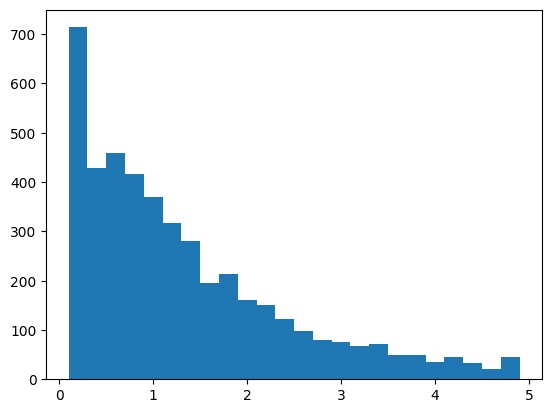

In [386]:
# plt.hist(y, bins=24)
# plt.show()

In [388]:
# from tpot import TPOTClassifier
# from tpot import TPOTRegressor
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
# tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
# tpot.fit(X_train, y_train)
# print(tpot.score(X_test, y_test))

                                                                              
Generation 1 - Current best internal CV score: -0.4152288668154531
                                                                              
Generation 2 - Current best internal CV score: -0.41014961812485706
                                                                                
Generation 3 - Current best internal CV score: -0.398202328957185
                                                                              
Generation 4 - Current best internal CV score: -0.398202328957185
                                                                              
Generation 5 - Current best internal CV score: -0.398202328957185
                                                                              
Best pipeline: RandomForestRegressor(ElasticNetCV(input_matrix, l1_ratio=0.45, tol=1e-05), bootstrap=False, max_features=0.35000000000000003, min_samples_leaf=1, min_samples_split=5, n_estima

c:\Users\samul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(
